In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
%matplotlib inline


# Load Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

# Data Pre-Processing

In [ ]:
#Menghilangkan Baris yang Kolom TotalChargesnya mengandung White Space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

#Mengubah Tipe Data TotalCharges menjadi Float
df['TotalCharges'] = df['TotalCharges'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df["SeniorCitizen"].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Insight :

- The data has 21 columns with 7032 rows
- There are 17 columns with Categorical data type and 4 columns with Numerical data type
- The data appears to have a data type that corresponds to the column, except for SeniorCitizen which should be Categorical (because the contents of the data are 1 and 0 only), but saved in the form of numbers


# Data Cleaning

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Missing values!

In [ ]:
df.duplicated().sum()

0

No duplicated Data!

# EDA with Rich Interpretations

## Statistical Summary

In [ ]:
#Grouping Columns by each data type and uses
Numerical = ["tenure","MonthlyCharges","TotalCharges"]
CategoricalUser = ["gender","SeniorCitizen","Partner","Dependents"]
CategoricalService = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                      "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
CategoricalAccount = ["Contract","PaperlessBilling","PaymentMethod"]

In [ ]:
#Numerical Data
df[Numerical].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Insight:

- Mean > 50% (Median) on **tenure and TotalCharges** indicates that the two columns have a **positive skewed distribution**
- Mean < 50% (Median) on **MonthlyCharges** indicates that the column has a **negative skewed distribution**
- The average customer has been with the company for **32 months** and the average monthly payment is **64.8 dollars**
- It can be seen that TotalCharges = tenure * MonthlyCharges + Unknown Additional Charge **bold text**
- The company's most loyal customer has been with the company for **72 months** (6 years) and the total revenue earned reaches **8684.8 dollars.**

In [ ]:
#Unique CategoricalUser
for col in CategoricalUser:
  print(col,"\n",df[col].describe(),"\n", df[col].value_counts(),"\n")

gender 
 count     7032
unique       2
top       Male
freq      3549
Name: gender, dtype: object 
 Male      3549
Female    3483
Name: gender, dtype: int64 

SeniorCitizen 
 count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64 
 0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Partner 
 count     7032
unique       2
top         No
freq      3639
Name: Partner, dtype: object 
 No     3639
Yes    3393
Name: Partner, dtype: int64 

Dependents 
 count     7032
unique       2
top         No
freq      4933
Name: Dependents, dtype: object 
 No     4933
Yes    2099
Name: Dependents, dtype: int64 



In [ ]:
#Unique CategoricalService
for col in CategoricalService:
  print(col,"\n",df[col].describe(),"\n", df[col].value_counts(),"\n")

PhoneService 
 count     7032
unique       2
top        Yes
freq      6352
Name: PhoneService, dtype: object 
 Yes    6352
No      680
Name: PhoneService, dtype: int64 

MultipleLines 
 count     7032
unique       3
top         No
freq      3385
Name: MultipleLines, dtype: object 
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService 
 count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object 
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity 
 count     7032
unique       3
top         No
freq      3497
Name: OnlineSecurity, dtype: object 
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 count     7032
unique       3
top         No
freq      3087
Name: OnlineBackup, dtype: object 
 No              

In [ ]:
# Unique CategoricalAccount
for col in CategoricalAccount:
  print(col,"\n",df[col].describe(),"\n", df[col].value_counts(),"\n")

Contract 
 count               7032
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object 
 Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64 

PaperlessBilling 
 count     7032
unique       2
top        Yes
freq      4168
Name: PaperlessBilling, dtype: object 
 Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64 

PaymentMethod 
 count                 7032
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object 
 Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64 



Insight:

- Column gender, Partner, Dependents, Phone Service, and PaperlessBilling, Churn has 2 unique, which is Yes and No, except for gender which consists of Male and Female
- The SeniorCitizen column should have been changed to the Categorical data type because it has values of 1 and 0, but is listed as Numerical
- The MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract columns have 3 unique, which is Yes, No, and No internet service, except for MultipleLines which consists of Yes, No, and No phone service, InternetService which consists of on Fiber optic, DSL, and No, and Contract consisting of Month-to-month, Two year, and One year
- The PaymentMethod column has 4 unique features, namely Electronic check, Mailed check, Bank transfer (automatic), and Credit Card (automatic).

## Univariate Analysis

% Customer Churn are
 No     73.42
Yes    26.58
Name: Churn, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


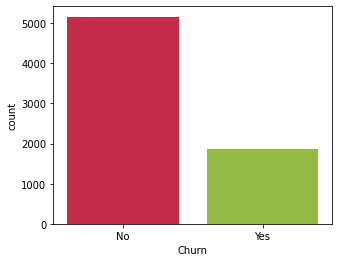

In [ ]:
#See Target Bar Plot
plt.figure(figsize=(5,4))

ChurnBar = sns.countplot(df["Churn"], palette = {'No':'crimson','Yes':'YellowGreen'})
print("% Customer Churn are\n", round(df.Churn.value_counts() / df.Churn.count()*100,2))

Insight:

- There are **73.42% of customers who do not churn** and **26.58% of customers who churn**. Although the number of customers who churn is much less when compared to customers who do not churn, churn itself is very important to analyze. This is because with churn customers, the revenue earned by the company will decrease. In addition, to replace churn customers with new customers is not as easy as keeping customers from churn.

Value % of gender column
Male      50.47
Female    49.53
Name: gender, dtype: float64 

Value % of SeniorCitizen column
0    83.76
1    16.24
Name: SeniorCitizen, dtype: float64 

Value % of Partner column
No     51.75
Yes    48.25
Name: Partner, dtype: float64 

Value % of Dependents column
No     70.15
Yes    29.85
Name: Dependents, dtype: float64 



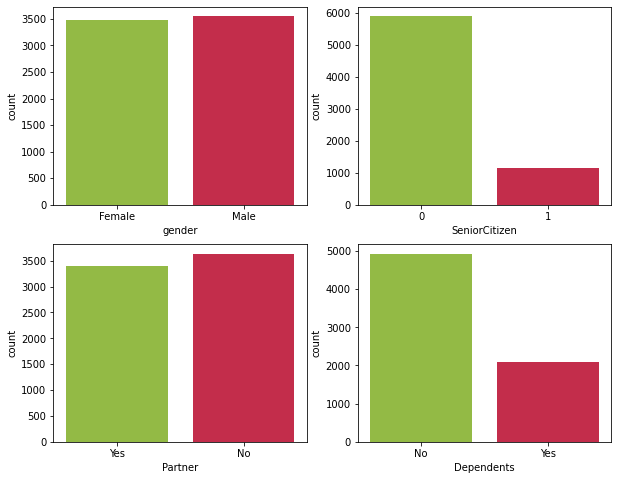

In [ ]:
#Percentage of Categorical User
for col in CategoricalUser:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Bar Plot for Categorical User
plt.figure(figsize=(10,8))

for i,col in enumerate(CategoricalUser):    
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col, palette = {'crimson','YellowGreen'})

Insight:

- The number of male and female customers is almost the same, which is almost 50%
- A total of **16.24% of customers are senior citizens** (represented by number 1), while most of the customers are younger people (non-senior citizen, represented by number 0)
- The number of customers who have and do not have partners is almost the same
As much as 30% of customers have dependents and the rest have no dependents
- Can be analyzed further about the relationship between Partners and Dependents and whether it can be assumed if **having a partner is the same as being married and if having dependents means having children**

Value % of PhoneService column
Yes    90.33
No      9.67
Name: PhoneService, dtype: float64 

Value % of MultipleLines column
No                  48.14
Yes                 42.19
No phone service     9.67
Name: MultipleLines, dtype: float64 

Value % of InternetService column
Fiber optic    44.03
DSL            34.36
No             21.62
Name: InternetService, dtype: float64 

Value % of OnlineSecurity column
No                     49.73
Yes                    28.65
No internet service    21.62
Name: OnlineSecurity, dtype: float64 

Value % of OnlineBackup column
No                     43.90
Yes                    34.49
No internet service    21.62
Name: OnlineBackup, dtype: float64 

Value % of DeviceProtection column
No                     44.00
Yes                    34.39
No internet service    21.62
Name: DeviceProtection, dtype: float64 

Value % of TechSupport column
No                     49.37
Yes                    29.01
No internet service    21.62
Name: TechSupport, dtype: f

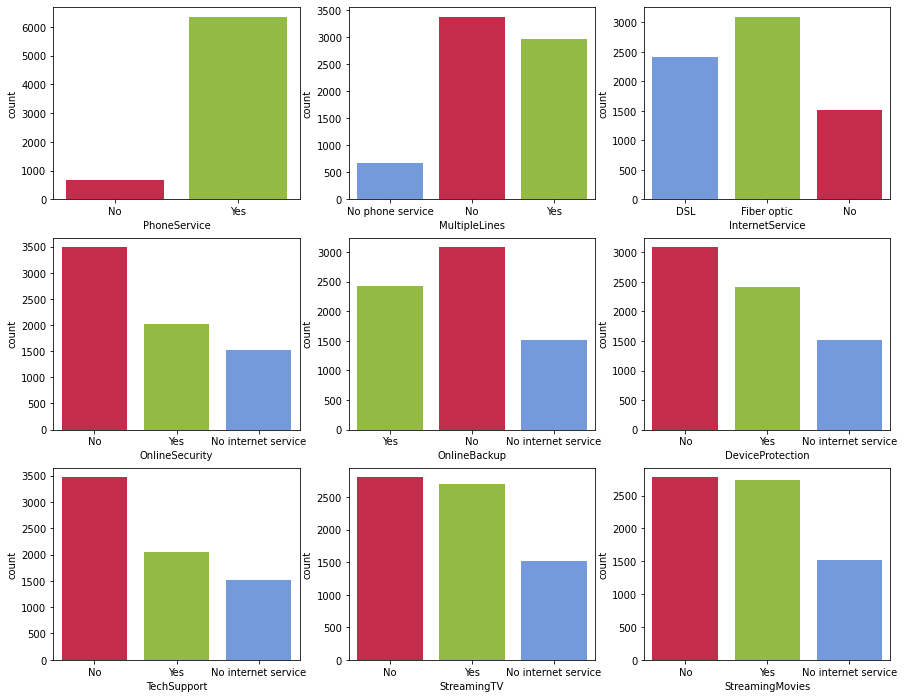

In [ ]:
#Percentage of Categorical Service
for col in CategoricalService:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Bar Plot for Categorical Service
plt.figure(figsize=(15,12))

for i,col in enumerate(CategoricalService):    
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col, palette = {'No':'crimson','Yes':'YellowGreen','Fiber optic':'YellowGreen','No internet service':'cornflowerblue','No phone service':'cornflowerblue','DSL':'cornflowerblue'})

Insight:

- 90% of customers join phone service from the company, of which 42.19% have multiple lines
- As many as 44% of customers join internet service with fiber optic, and 34% join internet service with DSL, and the rest do not join internet service. For companies, it can be searched more deeply why customers do not join the internet service because the number is quite large, which is around 22%.
- Approximately only 30% - 35% of customers join the additional services (online security, online backup, device protection, and tech support) offered by the company. Meanwhile, approximately 38% of customers join streaming TV and streaming movies.

Value % of Contract column
Month-to-month    55.11
Two year          23.96
One year          20.93
Name: Contract, dtype: float64 

Value % of PaperlessBilling column
Yes    59.27
No     40.73
Name: PaperlessBilling, dtype: float64 

Value % of PaymentMethod column
Electronic check             33.63
Mailed check                 22.81
Bank transfer (automatic)    21.93
Credit card (automatic)      21.63
Name: PaymentMethod, dtype: float64 



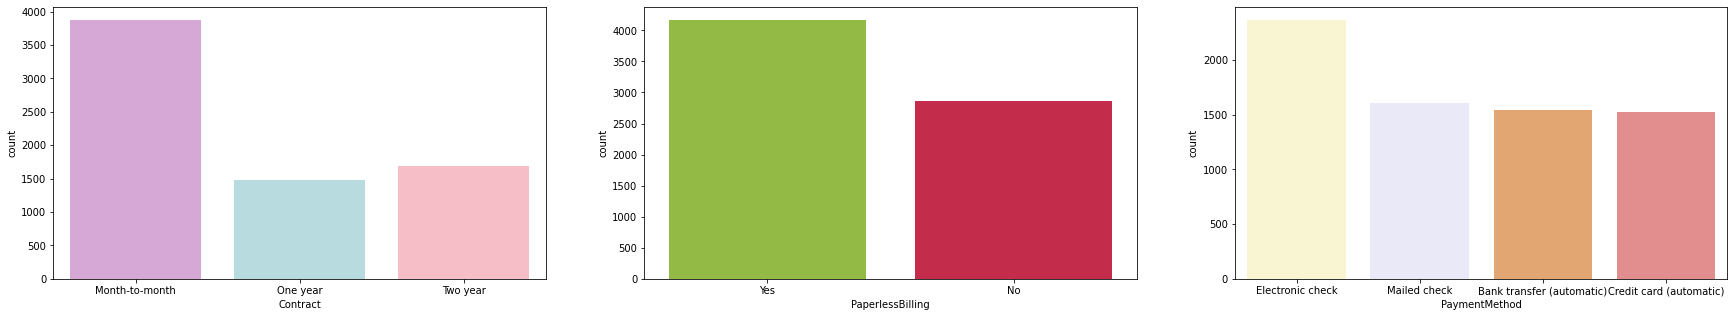

In [ ]:
#Percentage of Categorical Service
for col in CategoricalAccount:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Bar Plot for Categorical Account
plt.figure(figsize=(30,5))

for i,col in enumerate(CategoricalAccount):    
    plt.subplot(1,3,i + 1)
    ax = sns.countplot(data = df, x = col, palette={'Month-to-month':'plum','Two year':'lightpink','One year':'powderblue','No':'crimson','Yes':'YellowGreen','Electronic check':'lemonchiffon','Mailed check':'lavender','Bank transfer (automatic)':'sandybrown','Credit card (automatic)':'lightcoral'})

Insight:

- More than half of customers have month-to-month contracts with the company, while the rest are split between owners of 1 or 2 year contracts
- Nearly 60% of customers choose paperless billing, while the remaining 40% still choose to have paper bills sent
- Approximately 30% of customers choose a payment system by electronic check, while the rest are almost equally divided into choosing a payment system by mailed check, bank transfer (automatic), and credit card (automatic).

### Outliers

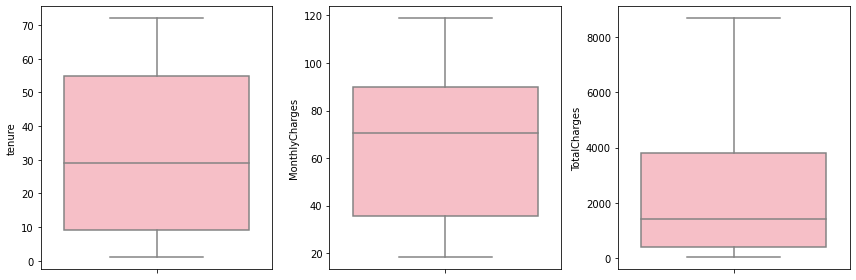

In [ ]:
#Membuat Boxplot
plt.figure(figsize=(12,4))

features = Numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightpink')
    plt.tight_layout()

No outliers!

### KDE Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

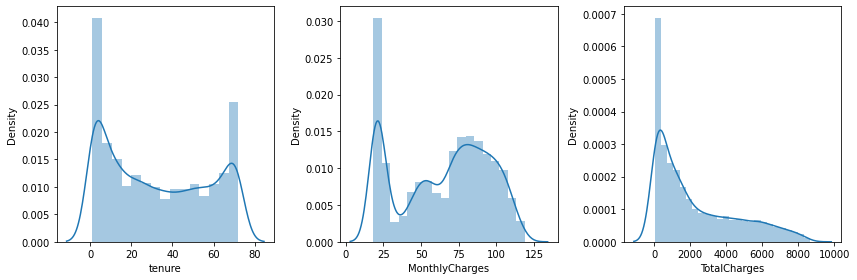

In [ ]:
#Membuat KDE Plot
plt.figure(figsize=(12,4))

features = Numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Insight :

- If you look at tenure, most of the customers have just joined the company. In addition, there are quite a number of loyal customers, which is customers who have been with the company for approximately 6 years (72 months). Can be analyzed further by looking at the relationship with the contract taken.
- Most customers who join generate revenue per month at a minimum value of $18.25. This is likely to happen because as we saw earlier, most of the customers did not join the additional service.
- Similar to MonthlyCharges, most companies get minimal revenue from customers.

## Multivariate/Bivariate Analysis

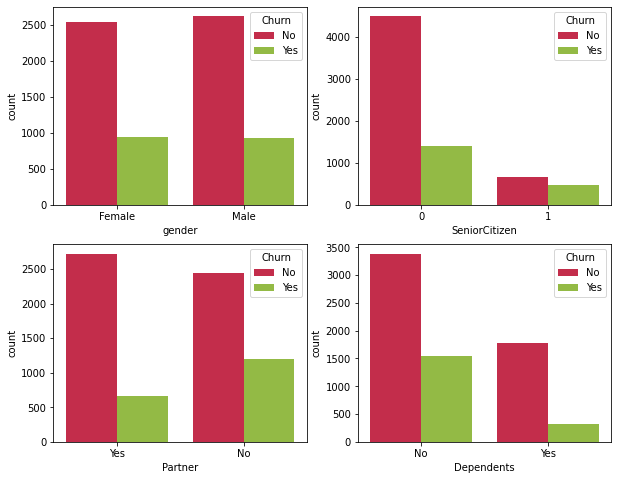

In [ ]:
#Churn with CategoricalUser
plt.figure(figsize=(10,8))

for i,col in enumerate(CategoricalUser):    
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Churn", palette = {'No':'crimson','Yes':'YellowGreen'})

Insight:

- Gender has no effect on churn. This is because the number and percentage of male and female churn are more or less the same
- In percentage terms, more senior citizens churn when compared to non-senior citizens
- Single customers are more churn when compared to customers who have partners
- Customers who do not have more dependents churn when compared to customers who have dependents

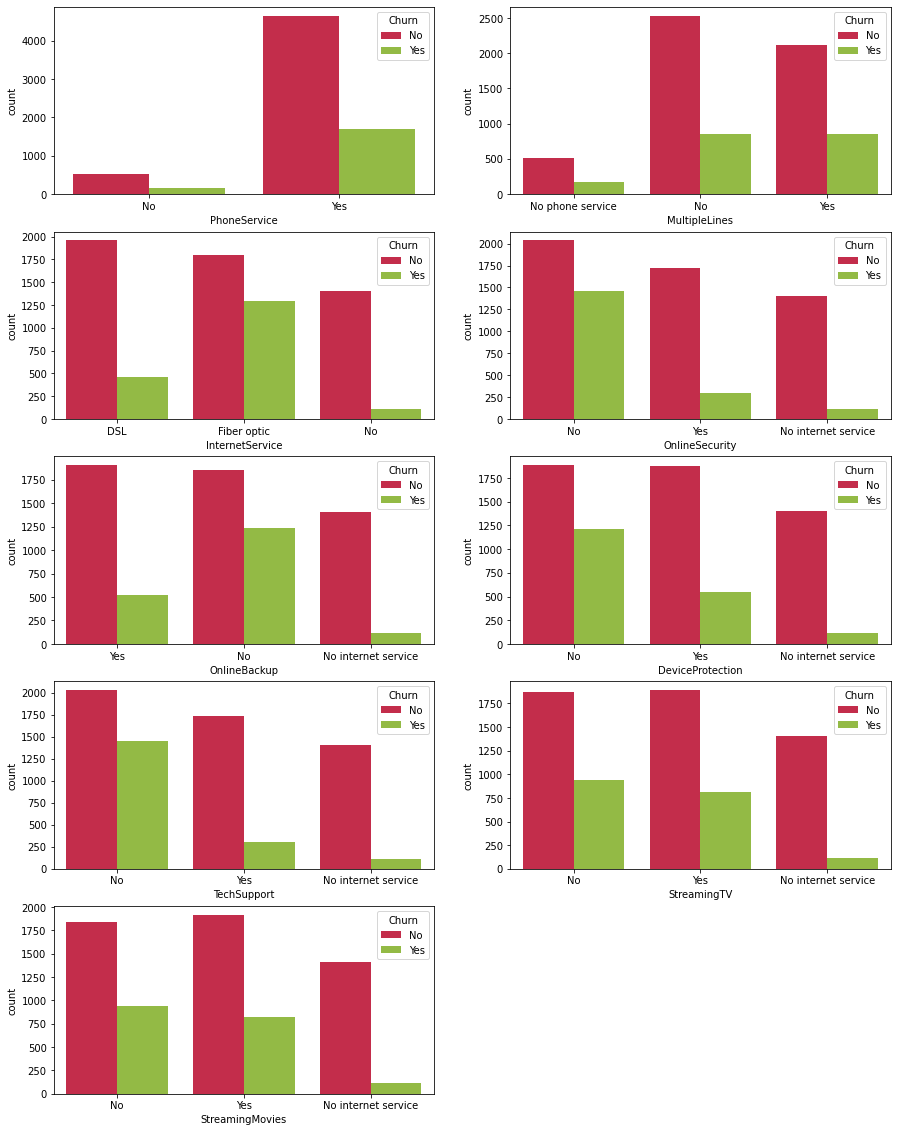

In [ ]:
# Churn with CategoricalService
plt.figure(figsize=(15,20))

for i,col in enumerate(CategoricalService):    
    plt.subplot(5,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Churn", palette = {'No':'crimson','Yes':'YellowGreen'})

Insight:

- Overall, the number of customers who do not use phone service is less when compared to the number of customers who do not use internet service. In addition, the number of customers who will churn on phone service is also not as much as the number of customers who will churn on internet service.
- Most of the customers who don't join internet service don't churn. More specifically, customers who churn are mostly customers who use internet service with fiber optic, while customers who use internet service with DSL have a lower churn rate.
- For additional services (online security, online backup, device protection, and tech support), it also has a smaller churn percentage compared to its main service (internet service).
- For additional services (streaming TV and streaming movies, both have almost the same value between churn and non-churn customers. Thus, it can be concluded that streaming TV and streaming movies cannot be used to determine the churn rate
- Additional services can be considered for further promotion because there are still many customers who have not joined the additional service and moreover the customer churn from the additional service is not as much as the customer churn from the main service

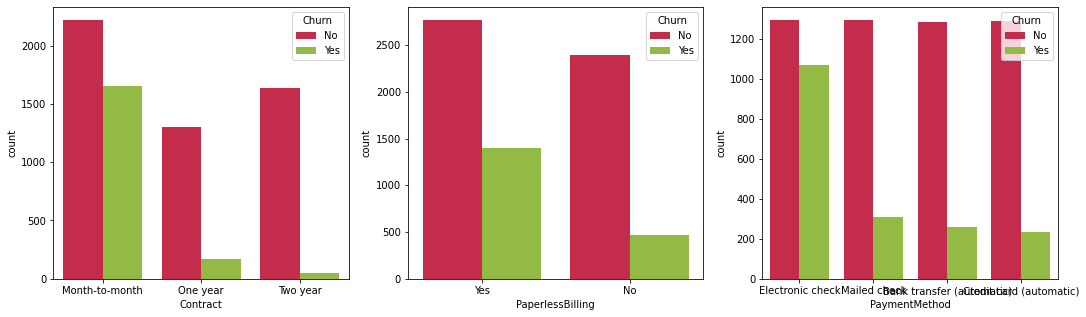

In [ ]:
#Churn with CategoricalAccount
plt.figure(figsize=(18,5))

for i,col in enumerate(CategoricalAccount):    
    plt.subplot(1,3,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Churn",palette = {'No':'crimson','Yes':'YellowGreen'})

Insight:

- Most customers have a month-by-month contract with the company and it is these customers who churn the most. In contrast, customers with long-term contracts, i.e. 1 or 2 years, have lower churn rates. This is probably due to a contract termination penalty or other rules that are more binding for customers with 1 or 2 year contracts
- Customers who choose paperless billing are more likely to churn when compared to those who still use paper. In addition, customers who choose payment systems with electronic checks also tend to churn when compared to other payment systems. Thus, it can be a question for the company whether there is a problem with the system, such as the possibility that the customer does not receive the billing, so he does not make a payment, and finally the service is terminated automatically by the company itself because it does not pay.

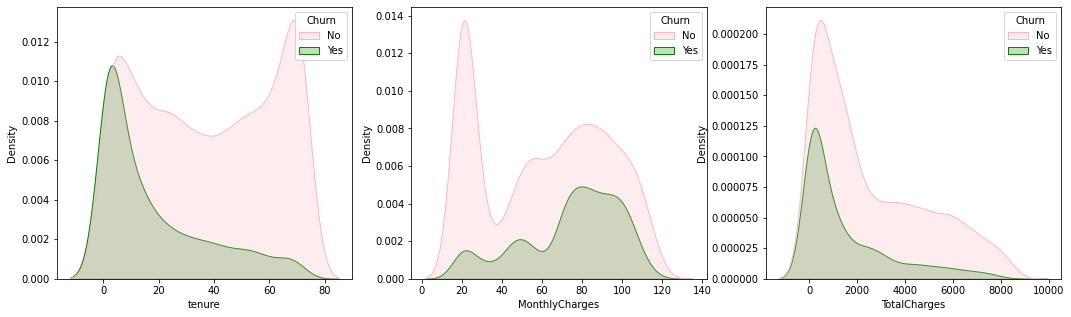

In [ ]:
#Churn with Numerical Data
plt.figure(figsize=(18,5))

for i,col in enumerate(Numerical):    
    plt.subplot(1,3,i + 1)
    ax = sns.kdeplot(x=col, hue="Churn", data=df, shade=True, palette = {'No':'lightpink','Yes':'Green'})

Insight:

- Customers with higher tenure, the less likely to churn. On the other hand, many customers churn in their first month joining the company. This is certainly not common in companies, so companies need to analyze further about the services offered because they fail to retain new customers
- Most customers who churn are customers who have a fairly high monthly payment, which is 60 and above
- Total charges have almost the same distribution form for churn and non-churn customers. However, in terms of value, customers who do not churn generate more revenue for the company

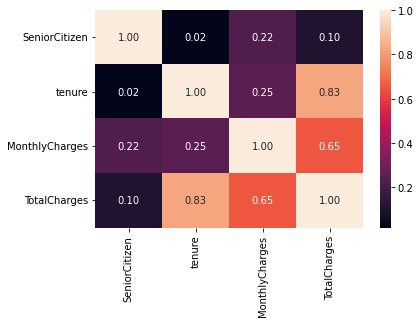

In [ ]:
#Correlation Heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Insight:

- It can be concluded that there is a positive correlation between variables
- The correlation between tenure and TotalCharges is very strong because it is above 0.8, whereas if it is assumed that the multicollinearity value is above 0.85, then there is no multicollinearity between tenure and TotalCharges.

<Figure size 720x360 with 0 Axes>

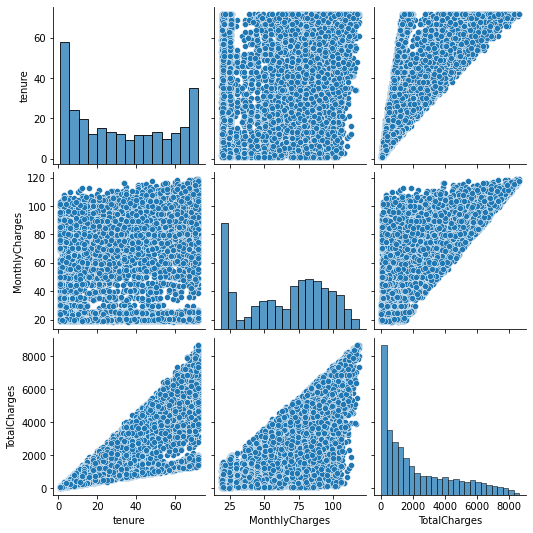

In [ ]:
#Pair Plot
plt.figure(figsize = (10,5))
sns.pairplot(df[Numerical])

Insight:

- The longer the customer joins the company (tenure), the greater the revenue received by the company (TotalCharges)
- Customers whose monthly fees are increasingly expensive (MonthlyCharges) generate greater revenue for the company (TotalCharges)

Conclusion:

1. The data has no significant problems, there are only a few rows of white space. In addition, no missing values, duplicates, or outliers were found.
2. For the data type itself, the data has categorical and numerical data types. There are 2 columns with inappropriate data types, which is TotalCharges and SeniorCitizen.
3. Data can be categorized by column into categorical user, categorical service, and categorical account, as well as numerical
4. Churn is the target variable that must be analyzed
5. The three numerical variables are very useful to help the analysis
6. Numerical data has a minimum and maximum value that makes sense for each column
7. Based on the analysis above, it can be seen that there are several factors that cause customer churn. The main cause is internet service with fiber optic. In contrast, customers with long-term contracts are the most likely to not churn.
8. Gender, Streaming TV, and Streaming Movies are variables that cannot indicate the presence of churn because they have almost the same value between churn and not churn.
9. There is a strong correlation between tenure and Total Charges. However, there is no multicollinearity.

# Perform Deep-Dive Exploration

## How many customers join phone service and internet service by type?

In [ ]:
customer2in1 = (df
            .groupby(["PhoneService","InternetService"])
            .agg(num_cust=("customerID","count"))
            .reset_index()
            .sort_values("num_cust",ascending=False)
            .head(10)
            )
customer2in1

,PhoneService,InternetService,num_cust
2,Yes,Fiber optic,3096
1,Yes,DSL,1736
3,Yes,No,1520
0,No,DSL,680


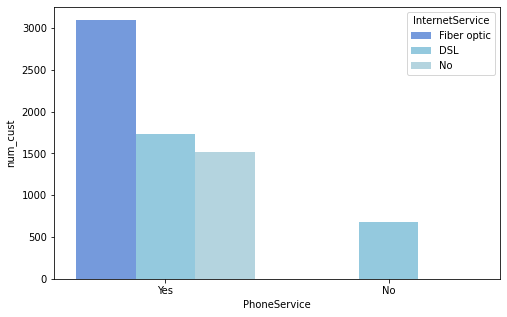

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=customer2in1, x="PhoneService", y="num_cust", hue="InternetService", palette = {'No':'lightblue','DSL':'skyblue','Fiber optic':'cornflowerblue'})
plt.show()

Customers who do not join the phone service can only install DSL internet, as many as 680 customers. Meanwhile, customers who join the phone service can choose between fiber optic or DSL internet. However, as many as 3096 customers prefer fiber optic internet, and as many as 1736 customers still choose to use DSL. Being a PR for the company, to be able to encourage as many as 1520 customers to join the internet service. Companies can offer bundling package phone service and internet service to attract these customers. In addition, the company can also offer a friend referral program to encourage customers who have joined to invite others to join the company

## What is the average monthly payment per internet service type?

In [ ]:
internet = (df
            .groupby(["InternetService"])
            .agg(mean_internet=("MonthlyCharges","mean"))
            .reset_index()
            .sort_values("mean_internet",ascending=False)
            .head(10)
            )
internet

,InternetService,mean_internet
1,Fiber optic,91.500129
0,DSL,58.088017
2,No,21.076283


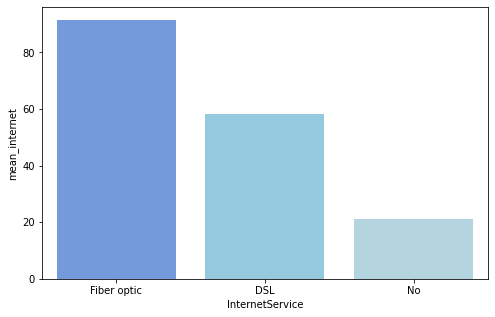

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=internet, x="InternetService", y="mean_internet", palette = {'No':'lightblue','DSL':'skyblue','Fiber optic':'cornflowerblue'})
plt.show()

Fiber optic is the internet service with the most expensive cost and as previously known, fiber optic is the service with the highest churn rate. Thus, it can be concluded that one of the causes of customer churn is probably the high price per month that must be paid by the customer which is not comparable to the service offered (it could be slow internet / frequent errors). Therefore, the company reviews incoming complaints or conducts surveys on relevant customers.

## What is the average monthly payment per senior citizen and non-senior citizen who churns and does not churn?

In [ ]:
senior = (df
            .groupby(["SeniorCitizen","Churn"])
            .agg(mean_month=("MonthlyCharges","mean"))
            .reset_index()
            .sort_values("mean_month",ascending=False)
            .head(10)
            )
senior

,SeniorCitizen,Churn,mean_month
3,1,Yes,80.713445
2,1,No,79.182057
1,0,Yes,72.298098
0,0,No,58.660196


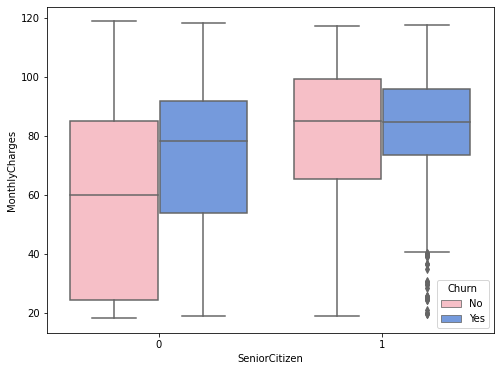

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df.SeniorCitizen, y = df.MonthlyCharges, hue = df.Churn, palette = {'No':'lightpink','Yes':'cornflowerblue'})
plt.show()

The average monthly payment per user received from senior citizens is higher than that of non-senior citizens. This is probably due to the fact that most senior citizens are parents who are more often at home and do not have many activities, so the possibility of joining additional services will be greater. To retain senior citizens from churn, special discounts for senior citizens can be offered or add features that are senior citizen friendly or streaming channels that are senior citizen friendly.

## Who are Top 10 customer with the longest tenure?

In [ ]:
top10 = df[['customerID','tenure','Churn']]
top10.head()

,customerID,tenure,Churn
0,7590-VHVEG,1,No
1,5575-GNVDE,34,No
2,3668-QPYBK,2,Yes
3,7795-CFOCW,45,No
4,9237-HQITU,2,Yes


In [ ]:
top10=top10.sort_values(by=['tenure'], ascending=False)
top10.head(10)

,customerID,tenure,Churn
2988,6295-OSINB,72,No
3823,9065-ZCPQX,72,No
3886,3786-WOVKF,72,No
6659,3967-KXAPS,72,No
6661,3704-IEAXF,72,No
4697,0129-KPTWJ,72,No
1753,2057-BOYKM,72,No
1746,3963-RYFNS,72,No
6189,4718-WXBGI,72,No
1735,2040-XBAVJ,72,No


10 Customers with the longest tenure choose not to be churn. We can find out why they choose not to churn, and provide the right strategy such as give them a discount or benefit for the next month's payment

## Who are Top 5 customer with the highest Monthly Charges?

In [ ]:
top5month = df[['customerID','MonthlyCharges','Churn']]
top5month.head(5)

,customerID,MonthlyCharges,Churn
0,7590-VHVEG,29.85,No
1,5575-GNVDE,56.95,No
2,3668-QPYBK,53.85,Yes
3,7795-CFOCW,42.30,No
4,9237-HQITU,70.70,Yes


In [ ]:
top5month=top5month.sort_values(by=['MonthlyCharges'], ascending=False)
top5month.head(5)

,customerID,MonthlyCharges,Churn
4586,7569-NMZYQ,118.75,No
2115,8984-HPEMB,118.65,No
4804,5734-EJKXG,118.60,No
3894,5989-AXPUC,118.60,No
5127,8199-ZLLSA,118.35,Yes


From 5 customers who have the highest MonthlyCharges, only 1 customer choose to be churn. The difference of the MonthlyCharges from the Top 5 are not significant. It means with the high MonthlyCharges, customers still tend to be churn.

We can do a few strategy such as give them discount or benefit for certain period payments

## Who are Top 5 customer with the highest Total Charges?

In [ ]:
top5total = df[['customerID','TotalCharges','Churn']]
top5total.head(5)

,customerID,TotalCharges,Churn
0,7590-VHVEG,29.85,No
1,5575-GNVDE,1889.50,No
2,3668-QPYBK,108.15,Yes
3,7795-CFOCW,1840.75,No
4,9237-HQITU,151.65,Yes


In [ ]:
top5total=top5total.sort_values(by=['TotalCharges'], ascending=False)
top5total.head(5)

,customerID,TotalCharges,Churn
4610,2889-FPWRM,8684.80,Yes
4586,7569-NMZYQ,8672.45,No
6768,9739-JLPQJ,8670.10,No
5347,9788-HNGUT,8594.40,No
2187,8879-XUAHX,8564.75,No


From 5 customers who have the highest TotalCharges, only 1 customer choose to be churn.

We can do a few strategy such as give them discount or benefit for certain period payments

## Who are Top 5 customer with the highest Monthly Charges and use Streaming TV?

In [ ]:
top5streamtv = df[['customerID','MonthlyCharges','StreamingTV','Churn']]

In [ ]:
top5streamtv=top5streamtv.sort_values(by=['MonthlyCharges'], ascending=False)
top5streamtv.head(5)

,customerID,MonthlyCharges,StreamingTV,Churn
4586,7569-NMZYQ,118.75,Yes,No
2115,8984-HPEMB,118.65,Yes,No
4804,5734-EJKXG,118.60,Yes,No
3894,5989-AXPUC,118.60,Yes,No
5127,8199-ZLLSA,118.35,Yes,Yes


## Who are Top 5 customer with the highest Monthly Charges and use Streaming Movies?

In [ ]:
top5streammv = df[['customerID','MonthlyCharges','StreamingMovies','Churn']]

In [ ]:
top5streammv=top5streammv.sort_values(by=['MonthlyCharges'], ascending=False)
top5streammv.head(5)

,customerID,MonthlyCharges,StreamingMovies,Churn
4586,7569-NMZYQ,118.75,Yes,No
2115,8984-HPEMB,118.65,Yes,No
4804,5734-EJKXG,118.60,Yes,No
3894,5989-AXPUC,118.60,Yes,No
5127,8199-ZLLSA,118.35,Yes,Yes


All the Top 5 customers who have high MonthlyCharges use StreamingMovie service. To attract customers to churn, we can give them free StreamingMovie access for certain time

## Which InternetService that has the highest charges in a year (MonthlyCharges *12)?

In [ ]:
df['Total'] = df['MonthlyCharges']  * 12

In [ ]:
highIS = (df
            .groupby(['InternetService'])
            .agg(total=('Total','sum'))
            .sort_values('total',ascending=False)
            .reset_index()
            )
highIS

,InternetService,total
0,Fiber optic,3399412.8
1,DSL,1684087.8
2,No,384431.4


Fiber Optic is the InternetService that has the highest Charge in a year with the total is 3399412.8

It can be said that the charge for fiber optic users is more than for DSL users

We can do the several marketing strategy to attract customers to Churn such as give the fiber optic users a special internet package with discount or another benefit